<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%206/Week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

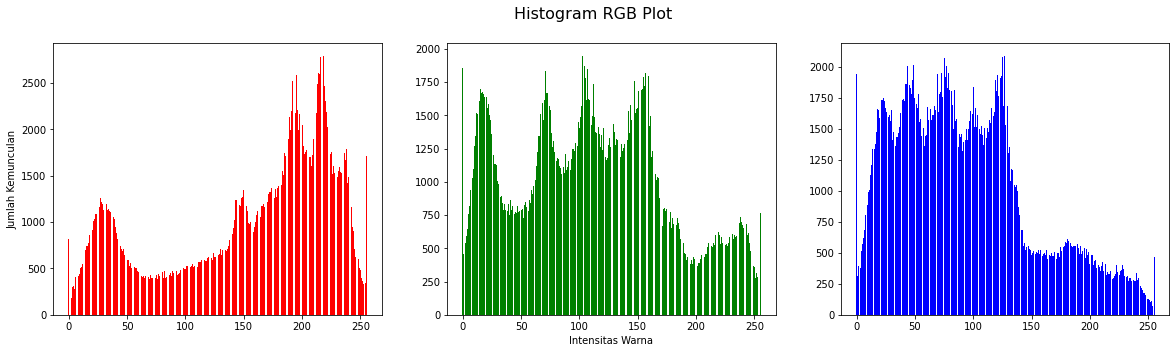

In [131]:
# Input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
hist_R = [0]*256
hist_G = [0]*256
hist_B = [0]*256
for row in img:
    for pixel in row:
        intensity = int(pixel[0])
        hist_B[intensity] += 1
        intensity = int(pixel[1])
        hist_G[intensity] += 1
        intensity = int(pixel[2])
        hist_R[intensity] += 1

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
keys = list(range(256))
values_R = hist_R
values_G = hist_G
values_B = hist_B

# # Normalisasi nilai histogram
# values_R = [i/sum(values_R) for i in values_R]
# values_G = [i/sum(values_G) for i in values_G]
# values_B = [i/sum(values_B) for i in values_B]

# Histogram Citra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Menampilkan histogram Red
ax1.bar(keys, values_R, color='red')
ax1.set_ylabel('Jumlah Kemunculan')

# Menampilkan histogram Green
ax2.bar(keys, values_G, color='green')
ax2.set_xlabel('Intensitas Warna')

# Menampilkan histogram Blue
ax3.bar(keys, values_B, color='blue')

# Menampilkan histogram citra
plt.suptitle('Histogram RGB Plot', fontsize=16)
plt.show()

# End

4.  Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

> Perbedaannya adalah pada cara menghitung histogram untuk setiap channel warna. Pada kode yang menggunakan NumPy, kita menggunakan fungsi np.histogram() untuk menghitung histogram untuk setiap channel warna, sedangkan pada kode yang menggunakan OpenCV, kita menggunakan perulangan for untuk menghitung histogram.

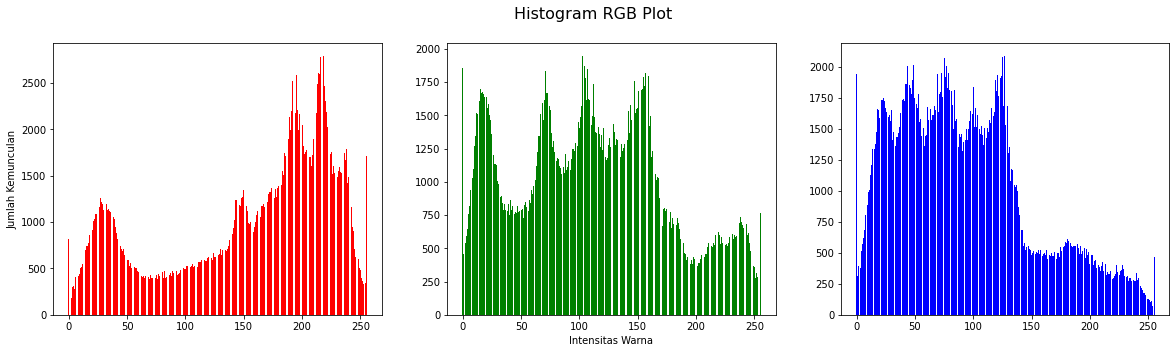

In [132]:
# Input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')

# Menghitung histogram untuk setiap channel warna
hist_B, bins = np.histogram(img[:,:,0], bins=256, range=[0, 256])
hist_G, bins = np.histogram(img[:,:,1], bins=256, range=[0, 256])
hist_R, bins = np.histogram(img[:,:,2], bins=256, range=[0, 256])

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
keys = list(range(256))
values_R = hist_R
values_G = hist_G
values_B = hist_B

# Histogram Citra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Menampilkan histogram Red
ax1.bar(keys, values_R, color='red')
ax1.set_ylabel('Jumlah Kemunculan')

# Menampilkan histogram Green
ax2.bar(keys, values_G, color='green')
ax2.set_xlabel('Intensitas Warna')

# Menampilkan histogram Blue
ax3.bar(keys, values_B, color='blue')

# Menampilkan histogram citra
plt.suptitle('Histogram RGB Plot', fontsize=16)
plt.show()

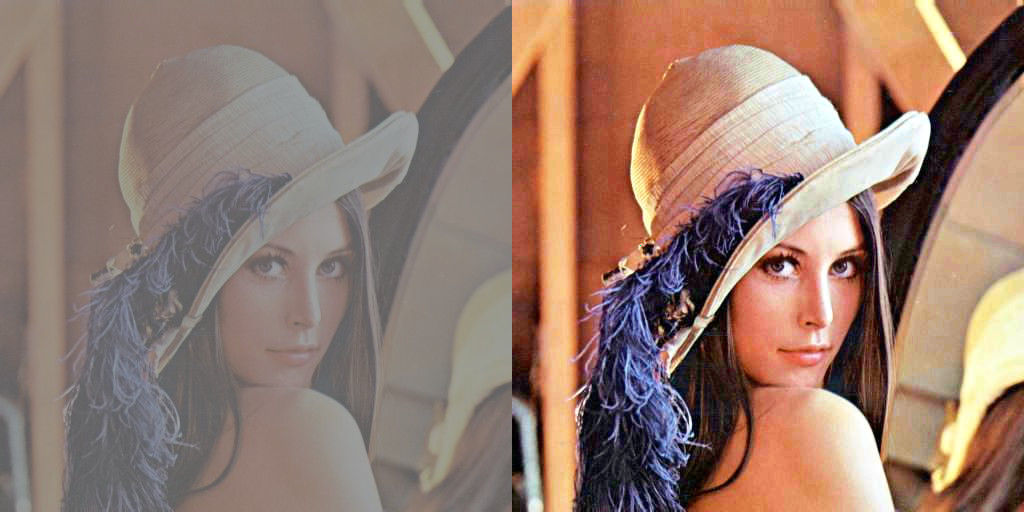

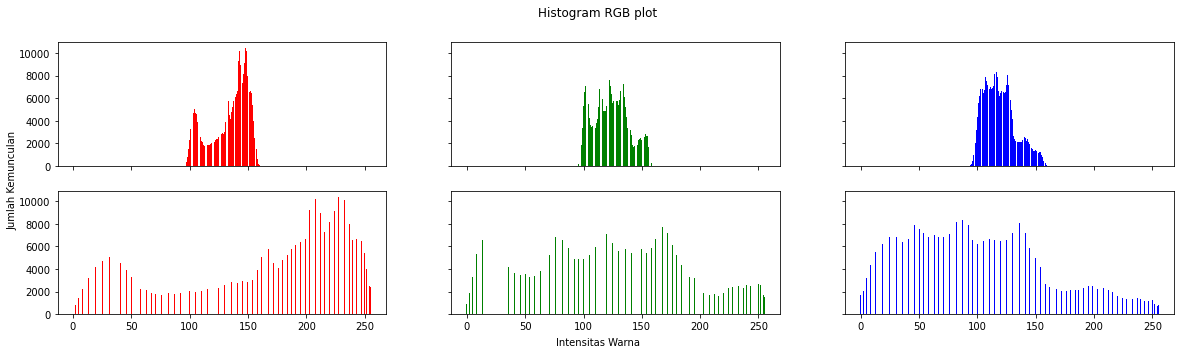

In [133]:
#Start
# Load input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena_lc.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi).
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

img_histog = histog(img)

# Convert dari image to numpy array
img_array = np.asarray(img)

# Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
histogram_array = np.bincount(img_array.flatten(), minlength=256)
jum_pixels = np.sum(histogram_array) 
jum_kumulatif = histogram_array/jum_pixels

# Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel
n_histogram_array = np.cumsum(jum_kumulatif)

# Hitung Nilai K0
K0 = np.ceil(np.max(n_histogram_array) * 255)

# Melakukan pemetaan nilai piksel ke nilai baru dengan menggunakan K0 dan jumlah kumulatif yang telah dinormalisasi.
transform_map = np.floor(K0 * n_histogram_array).astype(np.uint8)

# Melakukan transformasi pada gambar masukan.
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img_eq = eq_img_array

# Menghitung frekuensi dari setiap nilai piksel warna pada gambar yang telah di-transformasikan
eq_histog = histog(img_eq)

# Menampilkan gambar masukan dan gambar yang telah di-transformasikan secara berdampingan.
final_frame = cv.hconcat((img, img_eq)) 
cv2_imshow( final_frame)

# Membuat plot histogram RGB dari gambar masukan dan gambar yang telah di-transformasikan.
value = np.arange(256) 
img_gray = np.array_equal(img[:,:,0], img[:,:,1]) and np.array_equal(img[:,:,1], img[:,:,2])
if (img_gray == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(value, img_histog[2], color='red') 
  axs[0,1].bar(value, img_histog[1], color='green') 
  axs[0,2].bar(value, img_histog[0], color='blue') 
  axs[1,0].bar(value, eq_histog[2], color='red') 
  axs[1,1].bar(value, eq_histog[1], color='green')
  axs[1,2].bar(value, eq_histog[0], color='blue') 
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(value, img_histog[2], color='gray') 
  axs[0,1].bar(value, eq_histog[2], color='gray')

  nomor 6

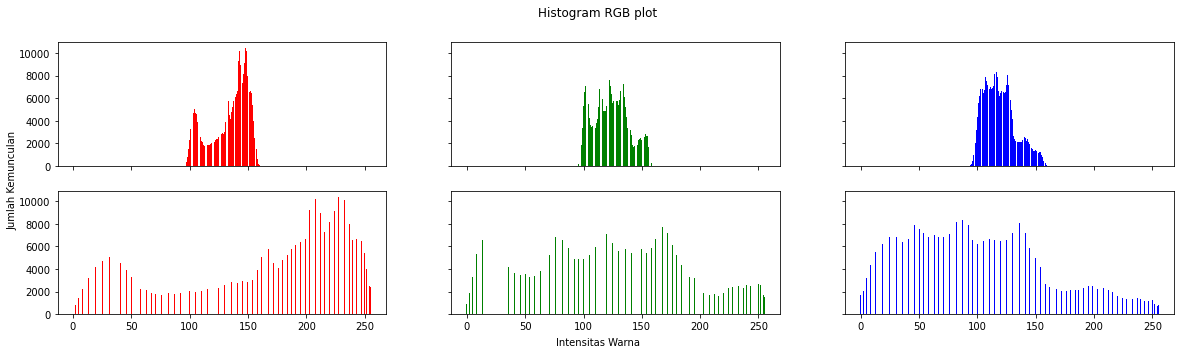

In [134]:
import cv2
import matplotlib.pyplot as plt

# Load input image
img = cv2.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena_lc.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization on each color channel separately
b, g, r = cv2.split(img)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

# Merge the equalized color channels back into an RGB image
img_eq = cv2.merge([b_eq, g_eq, r_eq])

# Membuat plot histogram RGB dari gambar masukan dan gambar yang telah di-transformasikan.
value = np.arange(256) 
img_gray = np.array_equal(img[:,:,0], img[:,:,1]) and np.array_equal(img[:,:,1], img[:,:,2])
if (img_gray == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(value, img_histog[2], color='red') 
  axs[0,1].bar(value, img_histog[1], color='green') 
  axs[0,2].bar(value, img_histog[0], color='blue') 
  axs[1,0].bar(value, eq_histog[2], color='red') 
  axs[1,1].bar(value, eq_histog[1], color='green')
  axs[1,2].bar(value, eq_histog[0], color='blue') 
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(value, img_histog[2], color='gray') 
  axs[0,1].bar(value, eq_histog[2], color='gray')